In [1]:
with open("res") as f:
    res = f.readlines()

In [2]:
res = eval(res[0])

In [7]:
res[0]

({'architecture': 'cnn',
  'batch_size': 4096.0,
  'bpe_symbols': 10000.0,
  'cnn_kernel_width': 3.0,
  'cnn_num_hidden': 1024.0,
  'initial_learning_rate': 0.0003,
  'num_embed': 1024.0,
  'num_layers': 10.0},
 {'dev_cpu_time': 1649.914,
  'dev_ppl': 25.638503,
  'gpu_memory': 5759,
  'num_param': 190404372,
  'num_updates': 38000})

In [9]:
res[100]

({'architecture': 'rnn',
  'batch_size': 4096.0,
  'bpe_symbols': 10000.0,
  'initial_learning_rate': 0.0006,
  'num_embed': 256.0,
  'num_layers': 4.0,
  'rnn_cell_type': 'gru',
  'rnn_num_hidden': 512.0},
 {'dev_cpu_time': 661.677,
  'dev_ppl': 36.382934,
  'gpu_memory': 6671,
  'num_param': 24043796,
  'num_updates': 404000})

In [10]:
res[500]

({'architecture': 'trans',
  'batch_size': 4096.0,
  'bpe_symbols': 50000.0,
  'initial_learning_rate': 0.001,
  'num_embed': 256.0,
  'num_layers': 2.0,
  'transformer_attention_heads': 8.0,
  'transformer_feed_forward_num_hidden': 2048.0,
  'transformer_model_size': 256.0},
 {'dev_cpu_time': 429.392,
  'dev_ppl': 27.935406,
  'gpu_memory': 5089,
  'num_param': 27952724,
  'num_updates': 40000})

In [3]:
rnn_hyps = ['batch_size','initial_learning_rate', 'num_embed', 'num_layers', 'rnn_cell_type', 'rnn_num_hidden']
cnn_hyps = ['batch_size','cnn_kernel_width','cnn_num_hidden','initial_learning_rate','num_embed','num_layers']
trans_hyps = ['batch_size','initial_learning_rate','num_embed','num_layers','transformer_attention_heads','transformer_feed_forward_num_hidden','transformer_model_size']

In [4]:
def make_lst(oneres, hyp_lst):
    vals = [oneres[0][h] for h in hyp_lst]
    return vals

In [5]:
def check_single_eval_two(res, hyp, archi, hyp_vals):
    if archi=="rnn":
        hyp_lst = list(rnn_hyps)
    elif archi=="cnn":
        hyp_lst = list(cnn_hyps)
    elif archi=="trans":
        hyp_lst = list(trans_hyps)
    hyp_lst.remove(hyp)
    vals_lst = []
    res_lst = []
    hv = {hyp_vals[0]:[],hyp_vals[1]:[]}
    for i in range(len(res)):
        if res[i][0]["architecture"]==archi:
            vals_lst.append(make_lst(res[i],hyp_lst))
            res_lst.append(res[i])
    for i in range(len(vals_lst)-1):
        for j in range(i+1, len(vals_lst)):
            if cmp(vals_lst[i], vals_lst[j])==0:
                if res_lst[i][0][hyp]==res_lst[j][0][hyp]:
                    continue
                hv[res_lst[i][0][hyp]].append(res_lst[i][1]["dev_ppl"])
                hv[res_lst[j][0][hyp]].append(res_lst[j][1]["dev_ppl"])
#     for k in hv:
#         print(sum(hv[k])/len(hv[k]))
    return hv

In [48]:
def check_single_eval_three(res, hyp, archi, hyp_vals):
    if archi=="rnn":
        hyp_lst = list(rnn_hyps)
    elif archi=="cnn":
        hyp_lst = list(cnn_hyps)
    elif archi=="trans":
        hyp_lst = list(trans_hyps)
    hyp_lst.remove(hyp)
    vals_lst = []
    res_lst = []
    hv = {hyp_vals[0]:[],hyp_vals[1]:[], hyp_vals[2]:[]}
    for i in range(len(res)):
        if res[i][0]["architecture"]==archi:
            vals_lst.append(make_lst(res[i],hyp_lst))
            res_lst.append(res[i])
    for i in range(len(vals_lst)-2):
        for j in range(i+1, len(vals_lst)-1):
            for m in range(i+2, len(vals_lst)):
                if cmp(vals_lst[i], vals_lst[j])==0 and cmp(vals_lst[i], vals_lst[m])==0:
                    if res_lst[i][0][hyp]==res_lst[j][0][hyp] or res_lst[m][0][hyp]==res_lst[j][0][hyp] or res_lst[i][0][hyp]==res_lst[m][0][hyp]:
                        continue
                    hv[res_lst[i][0][hyp]].append(res_lst[i][1]["dev_ppl"])
                    hv[res_lst[j][0][hyp]].append(res_lst[j][1]["dev_ppl"])
                    hv[res_lst[m][0][hyp]].append(res_lst[m][1]["dev_ppl"])
    return hv

In [81]:
hv = check_single_eval_two(res,"rnn_cell_type","rnn", ["gru","lstm"])
#np.array(hv["gru"])-np.array(hv["lstm"])
len(hv["gru"])

167

In [60]:
hv = check_single_eval_two(res,"num_layers","cnn", [10,20])
#np.array(hv[20])-np.array(hv[10])

In [84]:
hv = check_single_eval_three(res, "rnn_num_hidden", "rnn", [256,512,1024])
#np.array(hv[1024])-np.array(hv[256])

In [80]:
hv = check_single_eval_two(res,"cnn_num_hidden","cnn", [256,1024])
np.array(hv[1024])-np.array(hv[256])

array([-1.05210700e+00, -7.88857400e+00, -4.95600000e-03, -1.11777380e+01,
       -1.56812100e+00, -5.22798200e+00,  4.87503719e+09,  4.87503718e+09])

In [9]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

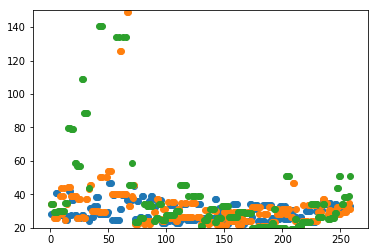

In [88]:
for k in hv:
    plt.scatter(np.arange(1, len(hv[k])+1), hv[k])
    #plt.scatter(np.arange(1, len(hv[4096])+1), hv[4096])

# ks = hv.keys()
plt.ylim(20,150)
# x = np.arange(1, len(hv["gru"])+1)
# y = np.array(hv["gru"])-np.array(hv["lstm"])
# plt.plot(x,y,'o',color="orange", label="rnn_cell_type:gru-lstm")
# plt.plot(np.arange(1, len(hv["gru"])+1), np.zeros(len(hv["gru"])))
# plt.legend()
plt.show()
# plt.savefig("rnn_cell_type.png",format="png",frameon=False, bbox_inches = 'tight', pad_inches=0)

In [63]:
ks = hv.keys()
plt.ylim(-20,150)
x = np.arange(1, len(hv[10])+1)
y = np.array(hv[20])-np.array(hv[10])
plt.plot(x,y,'o',color="orange", label="cnn_num_layers: 20-10")
plt.plot(np.arange(1, len(hv[20])+1), np.zeros(len(hv[20])))
plt.legend()
plt.show()
#plt.savefig("cnn_num_layers.pdf",format="pdf",frameon=False, bbox_inches = 'tight', pad_inches=0)

In [79]:
ks = hv.keys()
plt.ylim(-20,150)
x = np.arange(1, len(hv[1024])+1)
y = np.array(hv[1024])-np.array(hv[256])
plt.plot(x,y,'o',color="orange", label="rnn_num_hidden: 1024-256")
plt.plot(np.arange(1, len(hv[1024])+1), np.zeros(len(hv[1024])), color="blue")
plt.legend()
#plt.show()
plt.savefig("rnn_num_hidden.png",format="png",frameon=False, bbox_inches = 'tight', pad_inches=0)

In [89]:
def find_max_min(count, res, archi):
    domain_lst = []
    eval_lst = []
    for r in res:
        if r[0]["architecture"]==archi:
            domain_lst.append(r[0])
            eval_lst.append(r[1]["train_ppl"])
    domain_max_lst = []
    eval_max_lst = []
    domain_min_lst = []
    eval_min_lst = []
    for i in range(count):
        max_ind = np.argmax(eval_lst)
        domain_max_lst.append(domain_lst[max_ind])
        eval_max_lst.append(eval_lst[max_ind])
        del domain_lst[max_ind]
        del eval_lst[max_ind]
        
        min_ind = np.argmin(eval_lst)
        domain_min_lst.append(domain_lst[min_ind])
        eval_min_lst.append(eval_lst[min_ind])
        del domain_lst[min_ind]
        del eval_lst[min_ind]
    
    return domain_max_lst, eval_max_lst, domain_min_lst, eval_min_lst
            
    

In [90]:
find_max_min(8, res, "cnn")

KeyError: 'train_ppl'

In [11]:
import rescale

In [12]:
def get_x_y(res, archi):
    domain_dict_lst = []
    eval_lst = []
    for r in res:
        if r[0]["architecture"]==archi:
            domain_dict_lst.append(r[0])
            eval_lst.append(r[1]["dev_ppl"])
    if archi=="rnn":
        rescale_dict = rescale.rnn_rescale_dict
        hyps = rescale.rnn_hyps
    elif archi=="cnn":
        rescale_dict = rescale.cnn_rescale_dict
        hyps = rescale.cnn_hyps
    elif archi=="trans":
        rescale_dict = rescale.trans_rescale_dict
        hyps = rescale.trans_hyps
    X = []
    X = rescale.rescale(domain_dict_lst, rescale_dict)
    Y = eval_lst
    return X,Y,hyps

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
X, Y, hyps = get_x_y(res,"trans")
X = np.array(X)
Y = np.array(Y)
reg = LinearRegression().fit(X,Y)

In [16]:
reg.score(X,Y)

0.6293349381149611

In [117]:
reg.coef_

array([32.14612211, 12.24685499, 29.68931133, -1.84956949, 40.97850766,
       -2.56766824])

In [17]:
list(zip(hyps, reg.coef_))

[('initial_learning_rate', 37.70255421812554),
 ('transformer_attention_heads', -6.677491039093142),
 ('num_layers', 7.857441277067832),
 ('transformer_feed_forward_num_hidden', -0.13026143659167388),
 ('num_embed', 22.177125960031233),
 ('transformer_model_size', 22.17712596003105)]